# Tutorial 2 - Fluid Visualization

This second tutorial for [*Introduction to Fluid Dynamics*](https://josephmacmillan.github.io/IntroductionToFluidDynamics/) will cover the basics of visualizing fluid flow -- using vector plots and streamlines, mostly.  

Now, an ideal fluid has two main properties -- the velocity at each point, and the pressure at each point.  So this tutorial will work up to the following visualization:
![Flow around a cylinder, with pressure](fig_cylinder_pressure.png)

That shows an ideal flow around a cylinder, with streamlines shown as the faint lines and the colours representing pressure (with pink as regions of highest pressure).  We'll build up to this slowly, learning how to visualize fluids along the way.

## 2.1 Vector Plots

If we're only interested in velocity, a vector plot makes sense.  Consider, for example, the flow given by
$$
\mathbf{u} = [x, -y].
$$
Let's look at just the first quadrant:

In [1]:
import numpy as np

x = np.linspace(0, 5, 10)
y = np.linspace(0, 5, 10)

Here we're importing NumPy and creating an array of values for horizontal and vertical positions.  But we actually need more than two arrays -- we need a *mesh* of values, or a grid.  That's a little confusing, but here's what I mean:

In [2]:
print("Here's the original array:\n", x)
xx, yy = np.meshgrid(x, y)
print("\nAnd here's the mesh:\n", xx)

Here's the original array:
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]

And here's the mesh:
 [[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
  3.33333333 3.88888889 4.44444444 5.        ]
 [0.         0.55555556 1.11111

So now we have a 10x10 matrix, with each row the original x array.  What's the point of that?  Together with the y matrix, we have a series of (x,y) pairs that represent each point within the region.  MatPlotLib has various functions that can draw something at these points; if, for example, we calculate the speed of the fluid at each point ...

In [3]:
uu = xx
vv = -yy

... then we can use matplotlib to plot vectors at each:

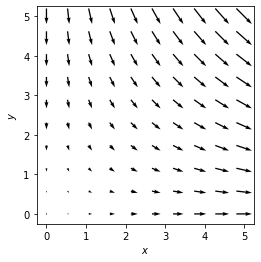

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.quiver(xx, yy, uu, vv, pivot='middle')

There's 100 (10x10) little arrows in the plot; we can adjust the size by changing the size of our original arrays:

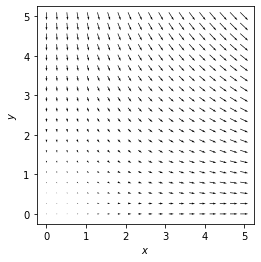

In [7]:
x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 20)
xx, yy = np.meshgrid(x, y)
uu = xx
vv = -yy

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.quiver(xx, yy, uu, vv, pivot='middle')

That might be too many, though, so use your judgement.

# 2.2 Streamlines

An alternative to visualizing the flow is with streamlines, which are a little less cluttering than vector plots but still carry lots of info.  Technically, a streamline is a curve in the fluid where, at each point, the curve has the same direction as the fluid velocity.    There are two ways to find streamlines, either directly or through the stream function. 

For example, the streamlines for the flow above are given by
$$
y(x) = \frac{c}{x},
$$
where $c$ is a constant -- different values will give you different streamlines.  Let's give it a try; we'll start by setting up the x axis and the constants, and then loop over the constants and plot each line.  I'll make the constant $c$ go from 0.3 to 23, since that makes the lines span the full region I'm plotting, and I'll plot 10 streamlines.

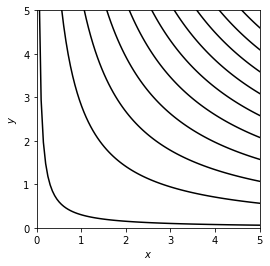

In [22]:
x = np.linspace(0.001, 5, 100)
c = np.linspace(0.3, 23, 10)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#ax.set_aspect('equal')
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

for k in c:
    y = k / x
    ax.plot(x, y, color='black')

That's not bad, but we don't always have the function that gives streamlines, and it can be a pain to derive. But we have two other options.

First, MatPlotLib has a built-in stream plot function that works just like a vector plot -- it takes the velocity components as input and makes a streamline plot instead of a bunch of vectors.  Here's what it looks like:

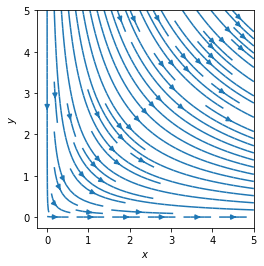

In [84]:
x = np.linspace(0.001, 5, 100)
y = np.linspace(0.001, 5, 100)
xx, yy = np.meshgrid(x, y)
uu = xx
vv = -yy

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.streamplot(xx, yy, uu, vv)

But, to be honest, I'm not too keen on this plot.  I expect streamlines to go to infinity (unless there's an object or line source present), but these sometimes randomly stop and start.  The second method uses the *stream function* $\psi$, which is constant on streamlines.

For our example flow, the stream function is
$$
\psi = xy.
$$
To use this in plotting, we'll have to follow a method similar to the vector plot and streamplot, but use MatPlotLib's contour function.  Here's how.

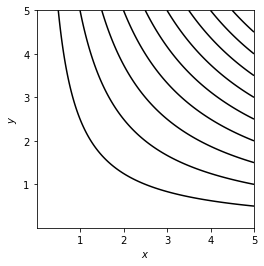

In [85]:
xx, yy = np.meshgrid(x, y)
psi = xx * yy

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.contour(xx, yy, psi, 11, colors='black')

## 2.3 Heat Maps

As a third visualization method, we could also plot a property of the fluid as a *heat map*, meaning that each point in the fluid is coloured according to the value of that property.  As a first example, we can do this for velocity and use MatPlotLib's imshow to display the meshgrid as an image.

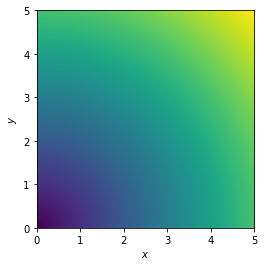

In [86]:
u = np.sqrt(uu**2 + vv**2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.imshow(u, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')

We can overlay streamlines just for fun:

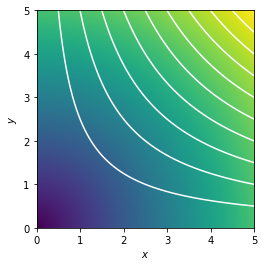

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ax.imshow(u, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
ax.contour(xx, yy, psi, 11, colors='white')

## 2.4 Adding Objects

Finally, we want to reproduce that figure at the top -- but it has a big grey circle in the middle, representing the cylinder the fluid surrounds.  We can add in a circle by creating one with the Circle function and then adding it to the axes with add_patch. 

This example is a little different than above -- the stream function is
$$
\psi = U \left( s - \frac{a^2}{s} \right) \sin \phi,
$$
and the pressure is given by
$$
p = p_\infty + \frac{1}{2} \rho U^2 \frac{a^2}{s^2} \left( 2 \cos 2 \phi - \frac{a^2}{s^2} \right).
$$
That's in cylindrical coordinates, if we convert to Cartesian, it becomes
$$
p = p_\infty + \frac{1}{2} \rho a^2 U^2 \left( \frac{2x^2 - 2y^2 - a^2}{(x^2 + y^2)^2} \right).
$$
I'll use $p_\infty = 0$ in the code for simplicity, and adjusted the vmin and vmax parameters in the imshow function to make sure that the image looks good (the pressure spikes to infinity inside the cylinder, but that's okay since there isn't any fluid there).

[[-0.00024691 -0.0003103  -0.00037493 ... -0.00037493 -0.0003103
  -0.00024691]
 [-0.00019018 -0.00025363 -0.00031835 ... -0.00031835 -0.00025363
  -0.00019018]
 [-0.00013229 -0.00019579 -0.00026058 ... -0.00026058 -0.00019579
  -0.00013229]
 ...
 [-0.00013229 -0.00019579 -0.00026058 ... -0.00026058 -0.00019579
  -0.00013229]
 [-0.00019018 -0.00025363 -0.00031835 ... -0.00031835 -0.00025363
  -0.00019018]
 [-0.00024691 -0.0003103  -0.00037493 ... -0.00037493 -0.0003103
  -0.00024691]] -1973466.3706174644 0.07995252964855698


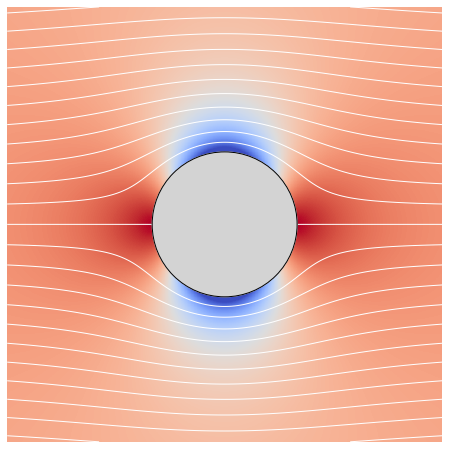

In [170]:
rho = 1.0
a = 1.0
U = 0.4

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)

xx, yy = np.meshgrid(x, y)
pp = 0.5 * rho * a**2 * U**2 * (2*xx**2 - 2*yy**2 - a**2) / (xx**2 + yy**2)**2
s = np.sqrt(xx**2 + yy**2)
sin_phi = yy / s 
psi = U * (s - a**2 / s) * sin_phi

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(pp, extent=[-3, 3, -3, 3], origin='lower', cmap='coolwarm', vmin = -0.2, vmax = 0.08)

plt.axis('off')

circ = plt.Circle((0,0),radius=a, fc='lightgrey', fill=True, alpha=1, zorder=3, color="black")
ax.add_patch(circ)

import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(xx, yy, psi, colors='white', levels = 400, alpha=1, linewidths = 1)

That's not exactly the same as the image above, but it's pretty close.  Go ahead and change parameters, colormaps, etc, to make an image you like.